In [2]:
# Import libraries / packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import dataset
df = pd.read_csv('dataset.csv')

# Declare feature vector and target variable
X = df.drop('class', axis=1)
y = df['class']

In [4]:
# Split data into training dataset (80%) and testing dataset (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Import Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Instantiate classifier
mnb = MultinomialNB()

# Fit classifier to training set
mnb.fit(X_train, y_train)

# Make predictions on test set
y_pred_mn= mnb.predict(X_test)

In [6]:
# Compute and print Multinomial NB accuracy score

from sklearn.metrics import accuracy_score

print('Multinomial Naive Bayes accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_mn)))

Multinomial Naive Bayes accuracy score: 0.8643


In [7]:
# Import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Instantiate classifier
gnb = GaussianNB()

# Fit classifier to training set
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

In [8]:
# Compute and print Gaussian Naive Bayes accuracy score

from sklearn.metrics import accuracy_score

print('Gaussian Naive Bayes accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Gaussian Naive Bayes accuracy score: 0.9643


In [9]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores_gnb = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
scores_mnb = cross_val_score(mnb, X_train, y_train, cv = 5, scoring='accuracy')

print('GNB cross-validation scores:{}'.format(scores_gnb))
print('MNB cross-validation scores:{}'.format(scores_mnb))

GNB cross-validation scores:[0.96428571 0.96428571 0.97321429 0.95535714 0.9375    ]
MNB cross-validation scores:[0.90178571 0.88392857 0.91071429 0.91071429 0.89285714]


In [10]:
# Compute Average cross-validation score

print('GNB average cross-validation score: {:.4f}'.format(scores_gnb.mean()))
print('MNB average cross-validation score: {:.4f}'.format(scores_mnb.mean()))

GNB average cross-validation score: 0.9589
MNB average cross-validation score: 0.9000


In [11]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[90  4]
 [ 1 45]]

True Positives(TP) =  90

True Negatives(TN) =  45

False Positives(FP) =  4

False Negatives(FN) =  1


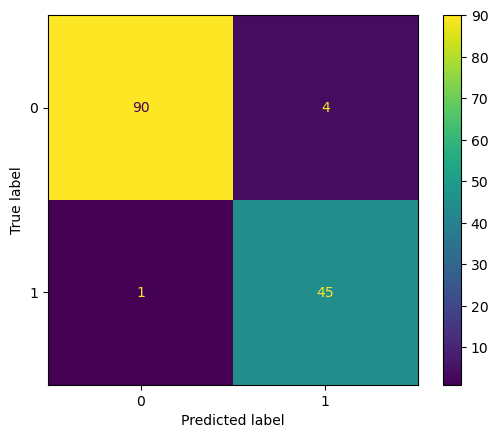

In [12]:
# Visualise confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm).plot()

In [13]:
# Print classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.92      0.98      0.95        46

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [14]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [15]:
# Print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9643


In [16]:
# Print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0357


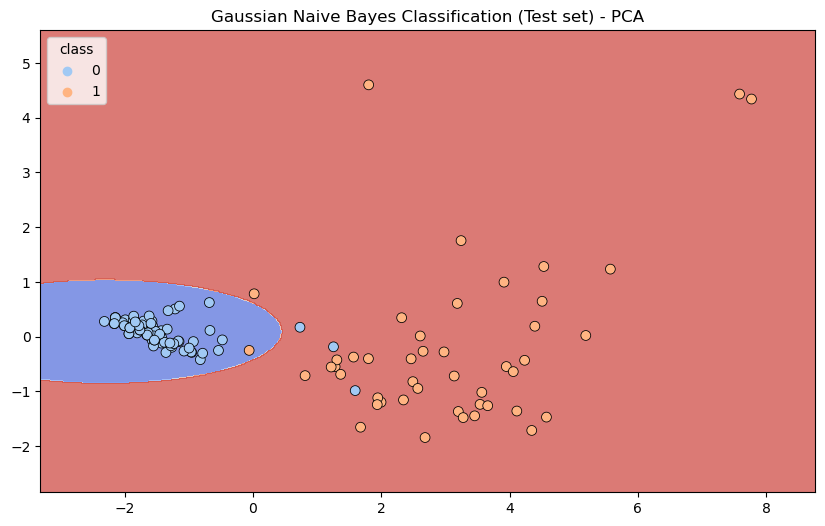

In [17]:
# Make a decision boundary plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a Gaussian Naive Bayes classifier
gnb.fit(X_pca, y_test)

# Creating meshgrid for visualisation
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Making predictions on the meshgrid points
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshaping Z
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)

# Plotting the data points
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test, palette="pastel", edgecolor='k', s=50)

# Adding title
plt.title('Gaussian Naive Bayes Classification (Test set) - PCA')
plt.legend(title='class')

plt.show()
